In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime


In [2]:
#Read data from csv file
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
display(data)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
#Define the month and year as index
month_year = data.index
print(month_year)
#Define the passengers for each month_year
Passenger = data['#Passengers']

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


Text(0, 0.5, 'Passengers')

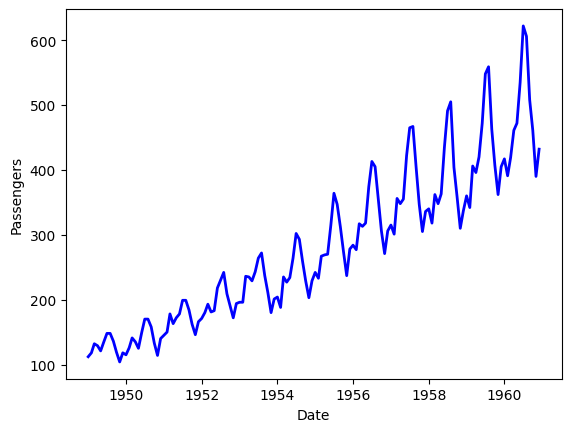

In [9]:
#Plot the data
plt.plot(month_year, Passenger, color='blue', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Passengers')

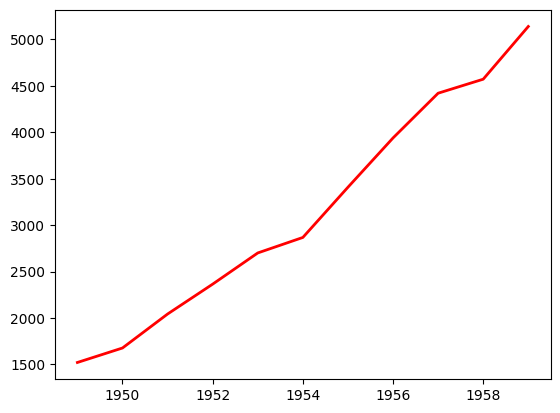

In [37]:
#Determine the range of the data years
first_year = datetime.strftime(Passenger.index.min() , '%Y')
last_year = datetime.strftime(Passenger.index.max(), '%Y')

#Create a vector containing each year
years = np.arange(first_year, last_year)

#Declare the vector for the number of passengers for each year
Passenger_year = np.zeros(len(years))

#Get the total passengers in each year
for i in range(0, len(years)):
    Passenger_year[i] = sum(Passenger[str(years[i])])

#Plot the total passengers in each year
plt.plot(years, Passenger_year, color='red', linestyle='-', linewidth=2)

Text(0, 0.5, 'Passengers')

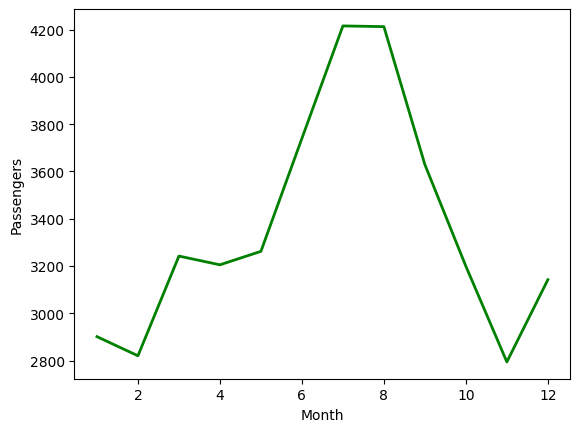

In [41]:
#Calculate the sum of the total passengers in each month
Passenger_month = Passenger.groupby([lambda x: x.month]).sum()
plt.plot(Passenger_month, color='green', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Passengers')

In [72]:
#Get the maximum value of the total passengers and the month correspoding to it
max_Passenger = Passenger_month.max()
max_month = np.argmax(Passenger_month)
min_Passenger = Passenger_month.min()
min_month = np.argmin(Passenger_month)

#print the maximum value and the corresponding month
months_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print('The month with more passengers is {} with {} passengers\n'.format(months_names[max_month], max_Passenger))
print('The month with less passengers is {} with {} passengers\n'.format(months_names[min_month], min_Passenger))

The month with more passengers is July with 4216 passengers

The month with less passengers is November with 2794 passengers

